In [81]:
#California Data Total Arrests

library(dplyr)
library(readr)
dset <- read_csv("OnlineArrestData1980-2018.csv")

Parsed with column specification:
cols(
  YEAR = col_double(),
  GENDER = col_character(),
  RACE = col_character(),
  AGE_GROUP = col_character(),
  COUNTY = col_character(),
  VIOLENT = col_double(),
  PROPERTY = col_double(),
  F_DRUGOFF = col_double(),
  F_SEXOFF = col_double(),
  F_ALLOTHER = col_double(),
  F_TOTAL = col_double(),
  M_TOTAL = col_double(),
  S_TOTAL = col_double()
)


In [82]:
dsetnew <- filter(dset, YEAR >= 2010 & YEAR <= 2018)
head(dsetnew)

YEAR,GENDER,RACE,AGE_GROUP,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,Male,Black,Under 18,Alameda County,337,393,83,16,116,945,602,89
2010,Male,Black,Under 18,Alpine County,0,0,0,0,0,0,1,0
2010,Male,Black,Under 18,Amador County,0,0,0,0,0,0,2,0
2010,Male,Black,Under 18,Butte County,9,11,0,1,5,26,55,2
2010,Male,Black,Under 18,Calaveras County,1,1,0,0,0,2,5,0
2010,Male,Black,Under 18,Colusa County,0,0,0,0,0,0,1,0


In [83]:
grouped_by_arrests <- dsetnew %>% group_by(YEAR) %>% summarise_at(vars(F_TOTAL, M_TOTAL), sum)

In [84]:
grouped_by_arrests$allarrests <- grouped_by_arrests$F_TOTAL + grouped_by_arrests$M_TOTAL
head(grouped_by_arrests)


YEAR,F_TOTAL,M_TOTAL,allarrests
<dbl>,<dbl>,<dbl>,<dbl>
2010,448552,918279,1366831
2011,419914,825455,1245369
2012,429807,792297,1222104
2013,442741,750985,1193726
2014,439958,762006,1201964
2015,314748,835370,1150118


In [85]:
library(ggplot2)
theme_set(theme_minimal())

## Total Arrests

Saving 6.67 x 6.67 in image


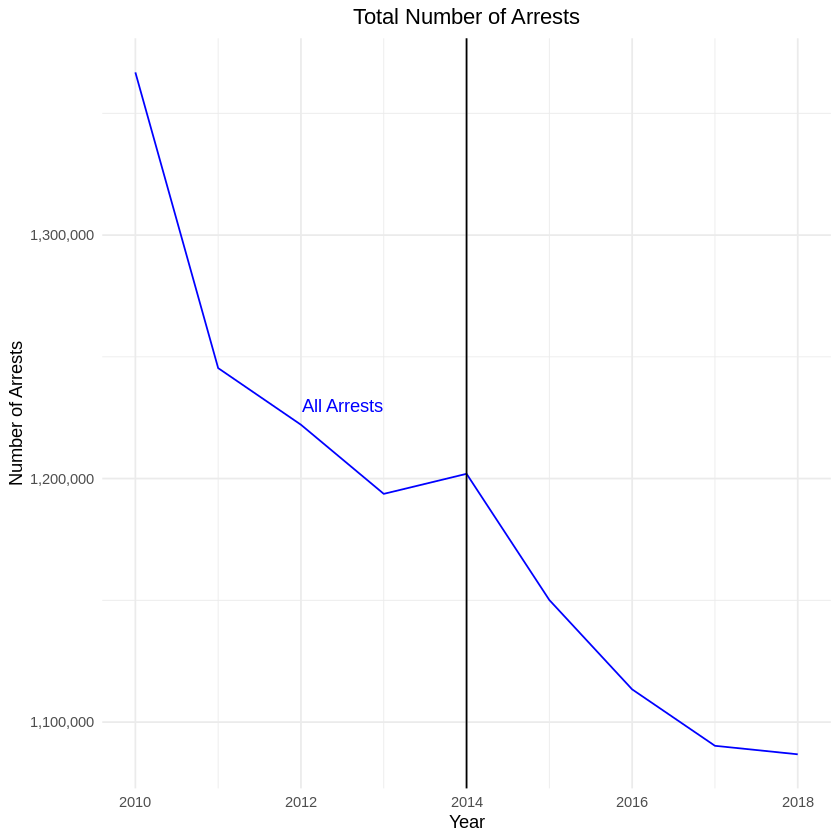

In [86]:
p = ggplot() +
    geom_line(data = grouped_by_arrests, aes(x = YEAR, y = allarrests), color = "blue") +
    ggtitle("Total Number of Arrests") +
    geom_text(aes(x = 2012.5), y= 1230000, label = "All Arrests", color = "blue") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Arrests')

require(scales)
p + scale_y_continuous(labels = comma)

ggsave("totalarrests.png")

## Total Arrests by Age across years

In [87]:
grouped_by_age <- dsetnew %>% group_by(YEAR, AGE_GROUP) %>% summarise_at(vars(F_TOTAL, M_TOTAL), sum)
grouped_by_age$allarrests <- grouped_by_age$F_TOTAL + grouped_by_age$M_TOTAL
head(grouped_by_age)

YEAR,AGE_GROUP,F_TOTAL,M_TOTAL,allarrests
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2010,18 to 19,38956,71575,110531
2010,20 to 29,153234,310211,463445
2010,30 to 39,94739,171008,265747
2010,40 to 69,108648,255575,364223
2010,70 and over,955,3657,4612
2010,Under 18,52020,106253,158273


Saving 6.67 x 6.67 in image


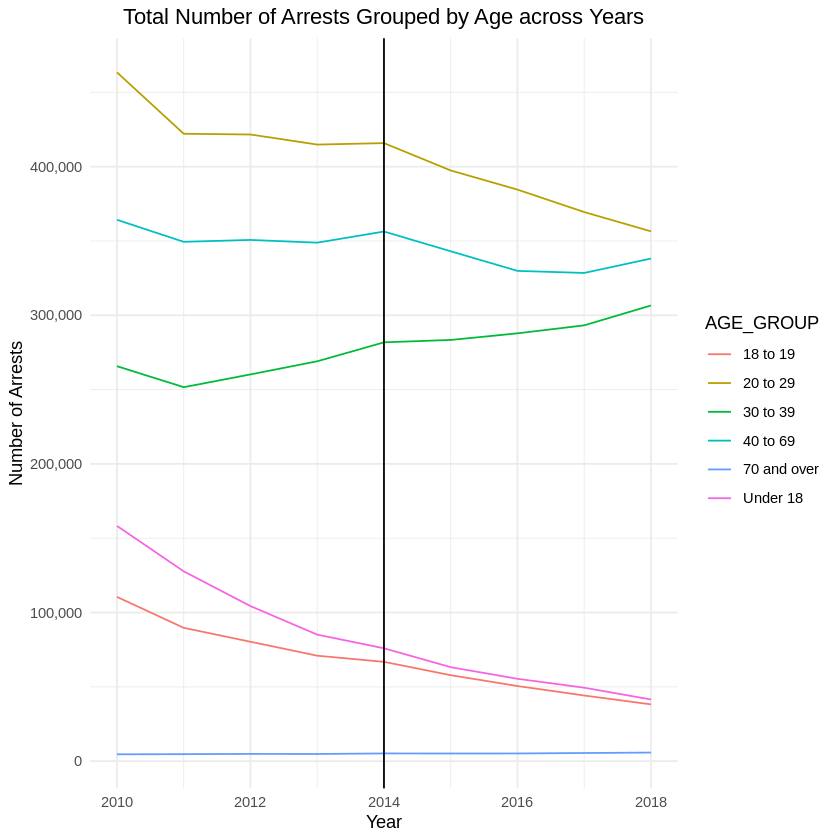

In [88]:
q = ggplot() +
    geom_line(data = grouped_by_age, aes(x = YEAR, y = allarrests, group = AGE_GROUP, colour = AGE_GROUP)) +
    ggtitle("Total Number of Arrests Grouped by Age across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Arrests')

require(scales)
q + scale_y_continuous(labels = comma)

ggsave("totalarrestsbyage.png")

## Felonies vs. Misdemeanors across Years

In [89]:
head(grouped_by_arrests)

YEAR,F_TOTAL,M_TOTAL,allarrests
<dbl>,<dbl>,<dbl>,<dbl>
2010,448552,918279,1366831
2011,419914,825455,1245369
2012,429807,792297,1222104
2013,442741,750985,1193726
2014,439958,762006,1201964
2015,314748,835370,1150118


Saving 6.67 x 6.67 in image


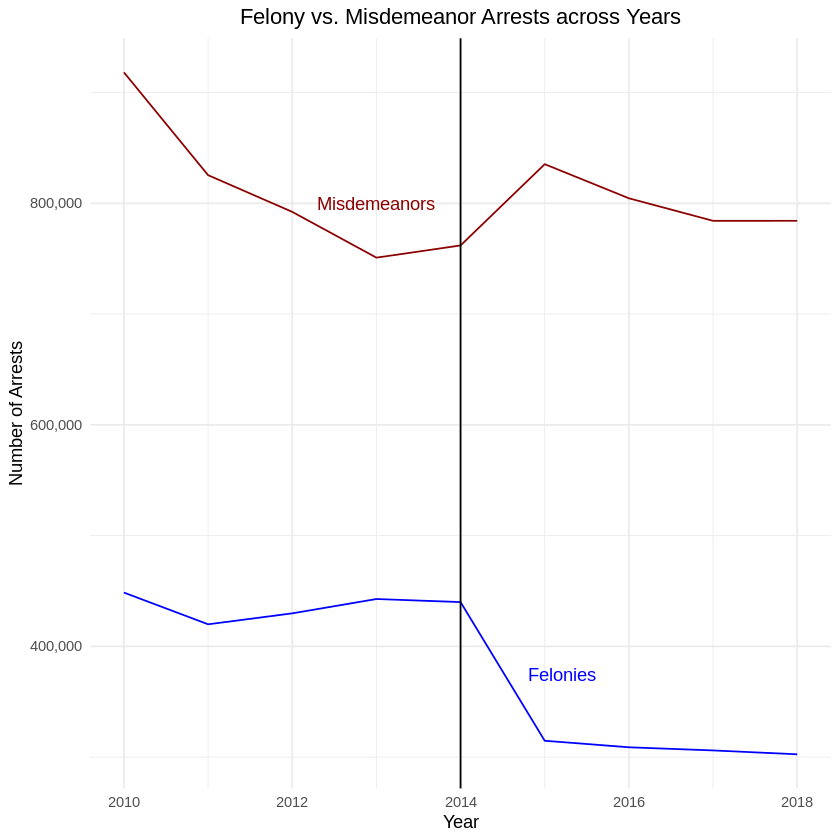

In [90]:
r = ggplot() +
    geom_line(data = grouped_by_arrests, aes(x = YEAR, y = F_TOTAL), color = "blue") +
    geom_text(aes(x = 2015.2), y= 375000, label = "Felonies", color = "blue") +
    geom_line(data = grouped_by_arrests, aes(x = YEAR, y = M_TOTAL), color = "darkred") +
    geom_text(aes(x = 2013), y= 800000, label = "Misdemeanors", color = "darkred") +
    ggtitle("Felony vs. Misdemeanor Arrests across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Arrests')

require(scales)
r + scale_y_continuous(labels = comma)

ggsave("feloniesmisdemeanors.png")

## Different types of Felony arrests across years

In [91]:
grouped_by_type_of_felonies <- dsetnew %>% group_by(YEAR) %>% summarise_at(vars(VIOLENT, PROPERTY, F_DRUGOFF, F_SEXOFF, F_ALLOTHER), sum)
head(grouped_by_type_of_felonies)

YEAR,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,116137,119942,121286,7862,83325
2011,109818,106815,115332,7454,80495
2012,107169,110244,120995,7201,84198
2013,103123,106995,137125,6706,88792
2014,107791,97806,137054,5982,91325
2015,109756,73970,44629,5593,80800


Saving 6.67 x 6.67 in image


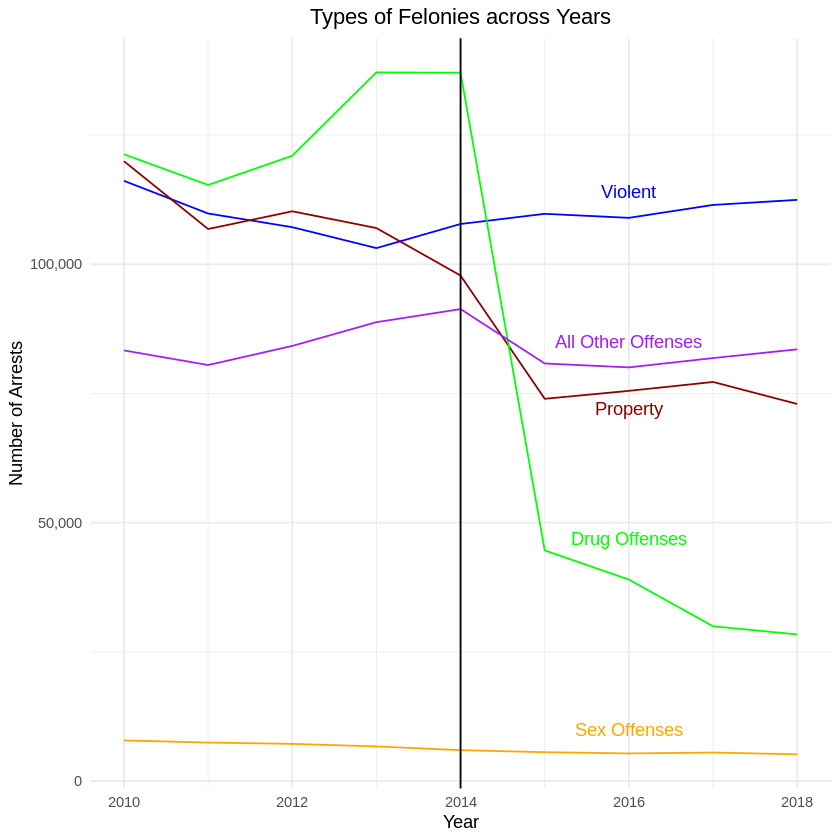

In [92]:
s = ggplot() +
    geom_line(data = grouped_by_type_of_felonies, aes(x = YEAR, y = VIOLENT), color = "blue") +
    geom_text(aes(x = 2016), y= 114000, label = "Violent", color = "blue") +
    geom_line(data = grouped_by_type_of_felonies, aes(x = YEAR, y = PROPERTY), color = "darkred") +
    geom_text(aes(x = 2016), y= 72000, label = "Property", color = "darkred") +
    geom_line(data = grouped_by_type_of_felonies, aes(x = YEAR, y = F_DRUGOFF), color = "green") +
    geom_text(aes(x = 2016), y= 47000, label = "Drug Offenses", color = "green") +
    geom_line(data = grouped_by_type_of_felonies, aes(x = YEAR, y = F_SEXOFF), color = "orange") +
    geom_text(aes(x = 2016), y= 10000, label = "Sex Offenses", color = "orange") +
    geom_line(data = grouped_by_type_of_felonies, aes(x = YEAR, y = F_ALLOTHER), color = "purple") +
    geom_text(aes(x = 2016), y= 85000, label = "All Other Offenses", color = "purple") +
    ggtitle("Types of Felonies across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Arrests')

require(scales)
s + scale_y_continuous(labels = comma)

ggsave("typeoffelonies.png")

## Percentage Drop in Drug Offenses from 2014 to 2015

In [93]:
a<-0
b<-length(dset$F_TOTAL)
for(i in 1:b){
    if(dset$YEAR[i]==2014){
    a<-a+dset$F_DRUGOFF[i]    
    }
}
print(a)

c<-0
d<-length(dset$F_TOTAL)
for(i in 1:d){
    if(dset$YEAR[i]==2015){
    c<-c+dset$F_DRUGOFF[i]    
    }
}
print(c)

[1] 137054
[1] 44629


In [94]:
((a-c)/a)*100

[1] 67.43692

## Felony Drug Offenses across years by Age Groups

In [95]:
grouped_by_age_and_drug <- dsetnew %>% group_by(YEAR, AGE_GROUP) %>% summarise_at(vars(F_DRUGOFF), sum)

Saving 6.67 x 6.67 in image


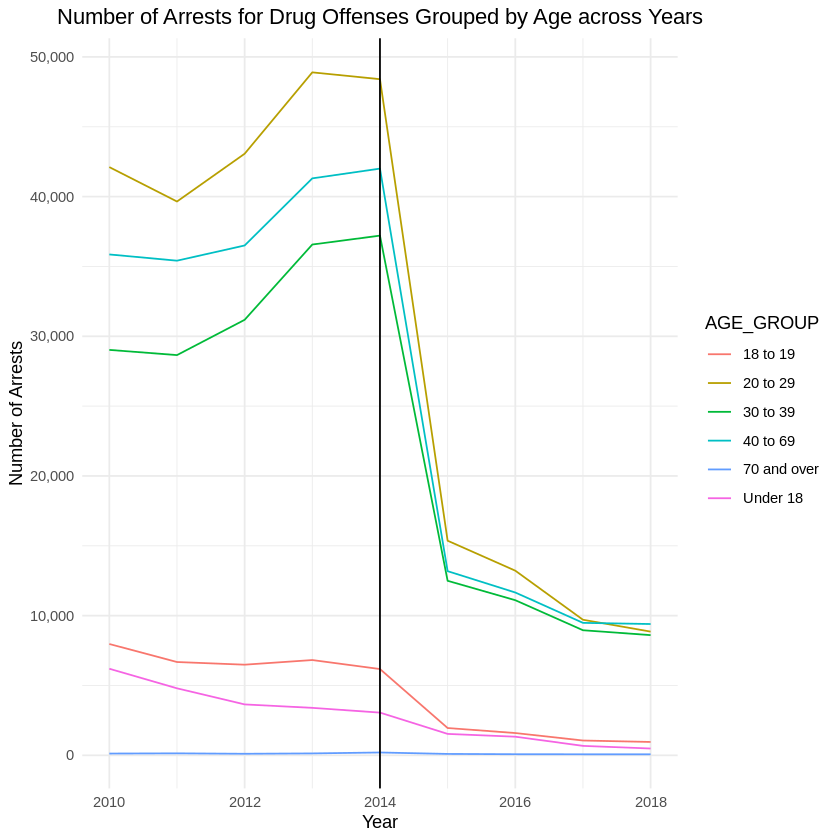

In [96]:
t = ggplot() +
    geom_line(data = grouped_by_age_and_drug, aes(x = YEAR, y = F_DRUGOFF, group = AGE_GROUP, colour = AGE_GROUP)) +
    ggtitle("Number of Arrests for Drug Offenses Grouped by Age across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Arrests')

require(scales)
t + scale_y_continuous(labels = comma)

ggsave("drugbyage.png")

## Felony Drug Offenses across years by Race

In [97]:
grouped_by_race <- dsetnew %>% group_by(YEAR, RACE) %>% summarise_at(vars(F_DRUGOFF), sum)

Saving 6.67 x 6.67 in image


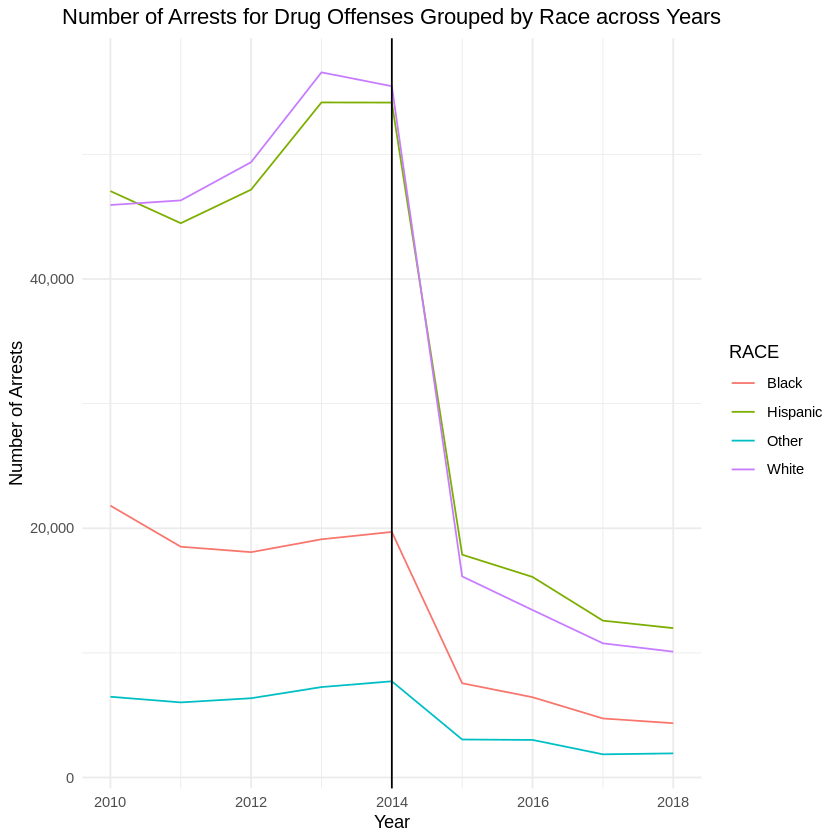

In [98]:
u = ggplot() +
    geom_line(data = grouped_by_race, aes(x = YEAR, y = F_DRUGOFF, group = RACE, colour = RACE)) +
    ggtitle("Number of Arrests for Drug Offenses Grouped by Race across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Arrests')

require(scales)
u + scale_y_continuous(labels = comma)

ggsave("drugbyrace.png")

## Felony Drug Offenses across years by Gender

In [99]:
grouped_by_gender <- dsetnew %>% group_by(YEAR, GENDER) %>% summarise_at(vars(F_DRUGOFF), sum)

Saving 6.67 x 6.67 in image


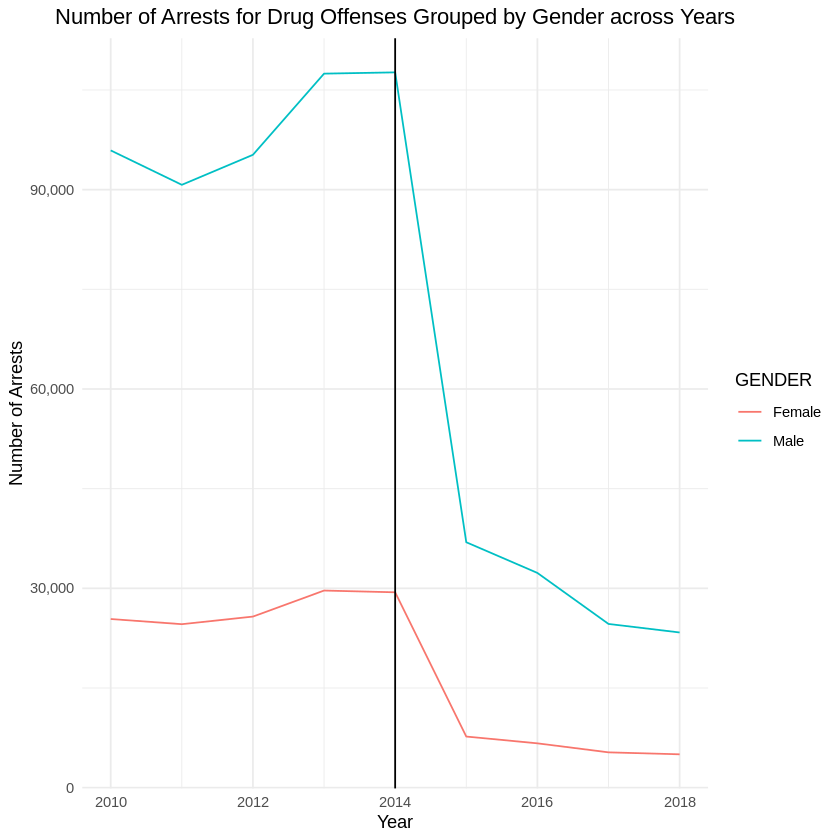

In [100]:
v = ggplot() +
    geom_line(data = grouped_by_gender, aes(x = YEAR, y = F_DRUGOFF, group = GENDER, colour = GENDER)) +
    ggtitle("Number of Arrests for Drug Offenses Grouped by Gender across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Arrests')

require(scales)
v + scale_y_continuous(labels = comma)

ggsave("drugbygender.png")